Headers aplicables a todas las funciones

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import random
from src.genetic.genetic_algorithm import genetic_algorithm
from csv import reader

def get_palette(path) -> np.ndarray:
  file = open(path)
  csvreader = reader(file)
  colors = []

  for row in csvreader:
    r, g, b = (int(x) for x in row)
    colors.append( [r, g, b] )

  return np.array(colors)   

def plot_evolution(best_of_each_generation_array, name):
    # Gráfico de evolución de cada sujeto
    n = len(best_of_each_generation_array)  # number of arrays
    M = max(len(a) for a in best_of_each_generation_array)

    for i in range(n):
        best_of_each_generation_array[i] += [None] * (M - len(best_of_each_generation_array[i]))

    for i in range(n):
        plt.plot(range(M), best_of_each_generation_array[i], label="")
        
    plt.title(f'Mejor de cada generación para {name}')
    plt.xlabel("Generación")
    plt.ylabel("Aptitud")
    plt.legend(f'Mejor sujeto de cada generación para {name}')
    plt.show()
    
    print(best_of_each_generation_array)

selection_options = ["ELITE", "ROULETTE", "UNIVERSAL", "TOURNAMENT_DETERMINISTIC", "TOURNAMENT_PROBABILISTIC"]
crossing_options = ["ONE_POINT", "DOUBLE_POINT", "ANGULAR", "UNIFORM"]
mutation_options = ["ONE_GEN", "MULTIGEN_LIMITED", "MULTIGEN_UNIFORM", "COMPLETE"]
select_new_generation_options = ["USE_ALL", "NEW_OVER_ACTUAL"]
color_count = 10
N = 100
K = 100
palette = get_palette("./src/colores.csv")
print(palette)
d_error = 0.01
time = -1
max_generations = 10

target_colors = []
for i in range(color_count):
    tupla = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    target_colors.append(tupla)
    
print(target_colors)

[[  0   0   0]
 [255   0   0]
 [  0 255   0]
 [  0   0 255]
 [255 255   0]
 [  0 255 255]
 [255   0 255]
 [255 255 255]]
[(145, 250, 135), (50, 68, 17), (239, 186, 188), (59, 58, 44), (91, 8, 238), (250, 65, 45), (109, 207, 242), (220, 85, 206), (57, 11, 3), (120, 220, 78)]


Run variando select

[(145, 250, 135), (50, 68, 17), (239, 186, 188), (59, 58, 44), (91, 8, 238), (250, 65, 45), (109, 207, 242), (220, 85, 206), (57, 11, 3), (120, 220, 78)]
ELITE


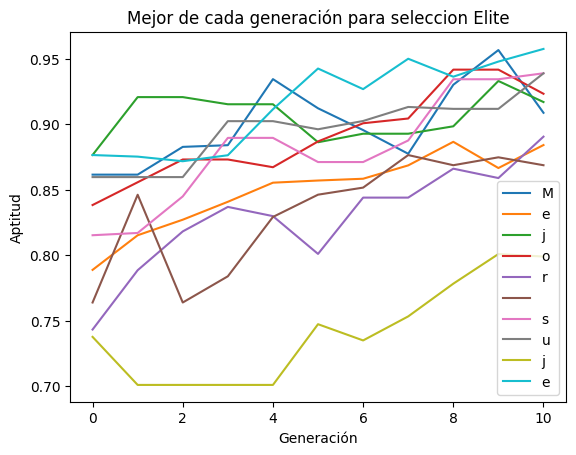

[[0.8614519707696241, 0.8614519707696241, 0.8826408553115486, 0.8839315350888768, 0.9343410491819667, 0.9120851794176456, 0.8954605023372035, 0.8773773032727532, 0.9300400115820997, 0.9565290852732777, 0.9086545197835036], [0.7887545700772159, 0.8151896509481229, 0.8270557428630009, 0.8407283338717781, 0.8553110966619644, 0.856960474199203, 0.8583222916526138, 0.8685122886518304, 0.8864966791314857, 0.8664948937919992, 0.8840359167844811], [0.8764521222488193, 0.9206256822663671, 0.9206256822663671, 0.9151682616325219, 0.9151682616325219, 0.8861742644199028, 0.892685619497454, 0.892685619497454, 0.8983406983507197, 0.9329371052879073, 0.916863782050798], [0.8382554285045283, 0.8556337820196871, 0.8730146649872998, 0.8730146649872998, 0.8671132750850212, 0.8867973141134556, 0.9006637523955444, 0.9042970680267925, 0.9415932050649423, 0.9415932050649423, 0.9231817701788132], [0.7432226142512224, 0.7884972314331165, 0.8181143140412626, 0.8368265169518513, 0.829783278814282, 0.8009559912704

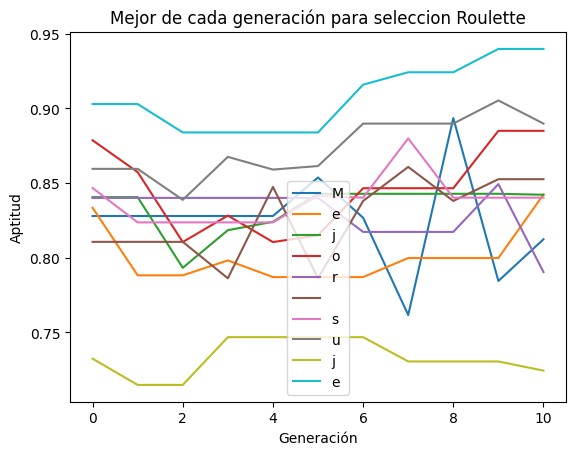

[[0.8278826599494549, 0.8278826599494549, 0.8278826599494549, 0.8278826599494549, 0.8278826599494549, 0.8536441698991475, 0.8267241251830528, 0.7616078669791001, 0.8934360214398032, 0.7843870361272192, 0.8123008075506556], [0.8334221484592288, 0.788154631030823, 0.788154631030823, 0.7981438539417516, 0.7869907921335608, 0.7869907921335608, 0.7869907921335608, 0.7997509189884042, 0.7997509189884042, 0.7997509189884042, 0.842283406515227], [0.8404944307464015, 0.8404944307464015, 0.793198039377876, 0.8183889189130134, 0.8240054022361856, 0.8427532201372925, 0.8427532201372925, 0.8427532201372925, 0.8427532201372925, 0.8427532201372925, 0.8421379307092123], [0.8785874720245799, 0.857281379350533, 0.8104555414834193, 0.8281632959465319, 0.8104555414834193, 0.8149468186361482, 0.8464918132131739, 0.8464918132131739, 0.8464918132131739, 0.8849122018072032, 0.8849122018072032], [0.8400146272952387, 0.8400146272952387, 0.8400146272952387, 0.8400146272952387, 0.8400146272952387, 0.8400146272952

KeyboardInterrupt: 

In [66]:
current_crossing = "UNIFORM"
current_mutation = "MULTIGEN_UNIFORM"
current_p_mutation = 0.5
current_combination = "USE_ALL"

print(target_colors) 
average_time = [] 
average_generations = [] 
  
std_errors_time = []
std_errors_generations = []
name = 0

selection_options_name = ["Elite", "Roulette", "Universal", "Tourney Det", "Tourney Prob"]
for option in selection_options:
    print(option)
    times = []
    generations = []
    best_of_each_generation_array = []
    for target_color in target_colors:

        time_passed, finish_condition, best_subject, best_of_each_generation, generation = genetic_algorithm(palette, N, target_color, option,
                        current_crossing, current_mutation, current_p_mutation,
                        current_combination, K, max_generations, d_error, time)

        times.append(time_passed)
        generations.append(generation)
        best_of_each_generation_array.append(best_of_each_generation)

        
    plot_evolution(best_of_each_generation_array, f'seleccion {selection_options_name[name]}' )
    name+=1
    
    avg_time = sum(times) / len(times)        
    average_time.append(avg_time)
    error_time = np.std(times) / np.sqrt(len(times))
    std_errors_time.append(error_time)

    avg_step = sum(generations) / len(generations)        
    average_generations.append(avg_step)
    error_step = np.std(generations) / np.sqrt(len(generations))
    std_errors_generations.append(error_step)
    
    
print(average_time)
print(std_errors_time)
print(average_generations)
print(std_errors_generations)

#----------------------------------------
#Grafico del tiempo que tarda
fig = plt.figure(figsize =(10, 7))
plt.bar(selection_options_name, average_time, yerr=std_errors_time, capsize=4, width=0.5, align="center")
plt.title(f'Tiempo promedio de resolución para {color_count} colores')
plt.xlabel('Método de selección')
plt.ylabel('Tiempo promedio de resolución (ms)')

plt.show()

#----------------------------------------
#Grafico de cantidad de pasos
fig = plt.figure(figsize =(10, 7))
plt.bar(selection_options_name, average_generations, yerr=std_errors_generations, capsize=4, width=0.5, align="center")
plt.title(f'Cantidad de generaciones para {color_count} colores')
plt.xlabel('Método de selección')
plt.ylabel('Número de generaciones')
plt.show()

Run variando cruza

In [ ]:
current_selection = "ELITE"
current_crossing = "UNIFORM"
current_p_mutation = 0.5
current_combination = "USE_ALL"

average_time = [] 
average_generations = [] 
  
std_errors_time = []
std_errors_generations = []
name = 0

crossing_options_name = ["Un punto", "Doble punto", "Angular", "Uniforme"]
for option in crossing_options:
    print(option)
    times = []
    generations = []
    best_of_each_generation_array = []
    for target_color in target_colors:

        time_passed, finish_condition, best_subject, best_of_each_generation, generation = genetic_algorithm(palette, N, target_color, current_selection,
                        option, current_mutation, current_p_mutation,
                        current_combination, K, max_generations, d_error, time)

        times.append(time_passed)
        generations.append(generation)
        best_of_each_generation_array.append(best_of_each_generation)

        
    plot_evolution(best_of_each_generation_array, f'cruza {crossing_options_name[name]}' )
    name+=1
    
    avg_time = sum(times) / len(times)        
    average_time.append(avg_time)
    error_time = np.std(times) / np.sqrt(len(times))
    std_errors_time.append(error_time)

    avg_step = sum(generations) / len(generations)        
    average_generations.append(avg_step)
    error_step = np.std(generations) / np.sqrt(len(generations))
    std_errors_generations.append(error_step)

print(average_time)
print(std_errors_time)
print(average_generations)
print(std_errors_generations)

#----------------------------------------
#Grafico del tiempo que tarda
fig = plt.figure(figsize =(10, 7))
plt.bar(crossing_options_name, average_time, yerr=std_errors_time, capsize=4, width=0.5, align="center")
plt.title(f'Tiempo promedio de resolución para {color_count} colores')
plt.xlabel('Método de cruza')
plt.ylabel('Tiempo promedio de resolución (ms)')

plt.show()

#----------------------------------------
#Grafico de cantidad de pasos
fig = plt.figure(figsize =(10, 7))
plt.bar(crossing_options_name, average_generations, yerr=std_errors_generations, capsize=4, width=0.5, align="center")
plt.title(f'Cantidad de generaciones para {color_count} colores')
plt.xlabel('Método de cruza')
plt.ylabel('Número de generaciones')
plt.show()

Run variando metodo de mutacion

In [ ]:
current_selection = "ELITE"
current_crossing = "UNIFORM"
current_p_mutation = 0.5
current_combination = "USE_ALL"

average_time = [] 
average_generations = [] 
  
std_errors_time = []
std_errors_generations = []
name = 0

mutation_options_name = ["Un gen", "Multigen limitado", "Multigen uniforme", "Completa"]
for option in mutation_options:
    print(option)
    times = []
    generations = []
    best_of_each_generation_array = []
    for target_color in target_colors:

        time_passed, finish_condition, best_subject, best_of_each_generation, generation = genetic_algorithm(palette, N, target_color, current_selection,
                        current_crossing, option, current_p_mutation,
                        current_combination, K, max_generations, d_error, time)

        times.append(time_passed)
        generations.append(generation)
        best_of_each_generation_array.append(best_of_each_generation)

        
    plot_evolution(best_of_each_generation_array, f'mutación {crossing_options_name[name]}' )
    name+=1
    
    avg_time = sum(times) / len(times)        
    average_time.append(avg_time)
    error_time = np.std(times) / np.sqrt(len(times))
    std_errors_time.append(error_time)

    avg_step = sum(generations) / len(generations)        
    average_generations.append(avg_step)
    error_step = np.std(generations) / np.sqrt(len(generations))
    std_errors_generations.append(error_step)

print(average_time)
print(std_errors_time)
print(average_generations)
print(std_errors_generations)
    
#----------------------------------------
#Grafico del tiempo que tarda
fig = plt.figure(figsize =(10, 7))
plt.bar(mutation_options_name, average_time, yerr=std_errors_time, capsize=4, width=0.5, align="center")
plt.title(f'Tiempo promedio de resolución para {color_count} colores')
plt.xlabel('Método de mutación')
plt.ylabel('Tiempo promedio de resolución (ms)')

plt.show()

#----------------------------------------
#Grafico de cantidad de pasos
fig = plt.figure(figsize =(10, 7))
plt.bar(mutation_options_name, average_generations, yerr=std_errors_generations, capsize=4, width=0.5, align="center")
plt.title(f'Cantidad de generaciones para {color_count} colores')
plt.xlabel('Método de mutación')
plt.ylabel('Número de generaciones')
plt.show()

Run variando porcentaje de mutación

In [ ]:
current_selection = "ELITE"
current_crossing = "UNIFORM"
current_mutation = "MULTIGEN_UNIFORM"
current_combination = "USE_ALL"

average_time = [] 
average_generations = [] 
  
std_errors_time = []
std_errors_generations = []
name = 0

p_mutation_options = [0.2, 0.4, 0.6, 0.8, 1]
p_mutation_options_name = ["0.2", "0.4", "0.6", "0.8", "1"]
for option in p_mutation_options:
    print(option)
    times = []
    generations = []
    best_of_each_generation_array = []
    for target_color in target_colors:

        time_passed, finish_condition, best_subject, best_of_each_generation, generation = genetic_algorithm(palette, N, target_color, current_selection,
                        current_crossing, current_mutation, option,
                        current_combination, K, max_generations, d_error, time)

        times.append(time_passed)
        generations.append(generation)
        best_of_each_generation_array.append(best_of_each_generation)

        
    plot_evolution(best_of_each_generation_array, f'porcentaje mutación {p_mutation_options[name]}' )
    name+=1
    
    avg_time = sum(times) / len(times)        
    average_time.append(avg_time)
    error_time = np.std(times) / np.sqrt(len(times))
    std_errors_time.append(error_time)

    avg_step = sum(generations) / len(generations)        
    average_generations.append(avg_step)
    error_step = np.std(generations) / np.sqrt(len(generations))
    std_errors_generations.append(error_step)

print(average_time)
print(std_errors_time)
print(average_generations)
print(std_errors_generations)

#----------------------------------------
#Grafico del tiempo que tarda
fig = plt.figure(figsize =(10, 7))
plt.bar(p_mutation_options_name, average_time, yerr=std_errors_time, capsize=4, width=0.5, align="center")
plt.title(f'Tiempo promedio de resolución para {color_count} colores')
plt.xlabel('Porcentaje de mutación')
plt.ylabel('Tiempo promedio de resolución (ms)')

plt.show()

#----------------------------------------
#Grafico de cantidad de pasos
fig = plt.figure(figsize =(10, 7))
plt.bar(p_mutation_options_name, average_generations, yerr=std_errors_generations, capsize=4, width=0.5, align="center")
plt.title(f'Cantidad de generaciones para {color_count} colores')
plt.xlabel('Porcentaje de mutación')
plt.ylabel('Número de generaciones')
plt.show()